# ﻿[컴퓨터비전] 아임그루트 워터마크 만들기 :: OpenCV 활용

# 0. 사전준비

>## 1) 배경이 될 그루트 사진과, 아임그루트 워터마크 준비
>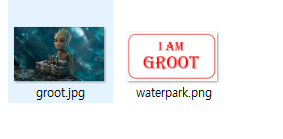

>저는 위의 사진 2개를 준비했습니다. 사진 파일 형식은 JPG, JPEG, PNG 등 사진 형식이어야 합니다.


>## 2) 분석 환경에 사진 파일 업로드
>사진 데이터를 분석환경인 코랩 파일 목록에 업로드 합니다.
>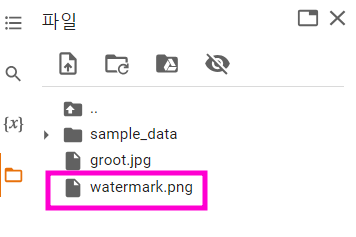

# 1. 이미지 불러오기 및 전처리
-
워터마크를 만들기 위해서는 Python OpenCV를 설치해야합니다.

-이후 이미지 불러오기와 컬러 보정까지 진행할게요!

﻿

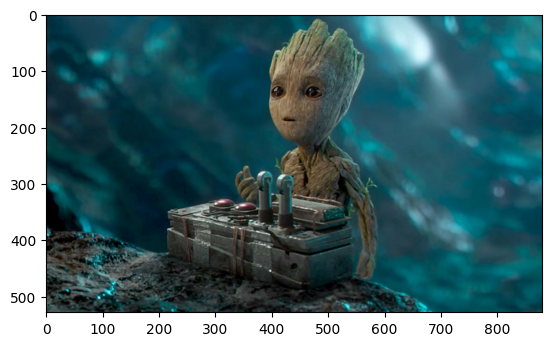

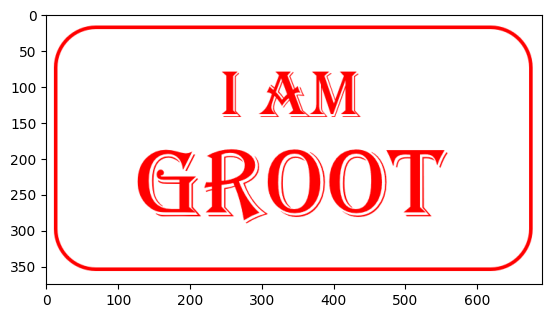

In [38]:
# OpenCV 설치
import cv2
import matplotlib.pyplot as plt

#이미지 불러오기
groot = cv2.imread('groot.jpg')
watermark = cv2.imread('watermark.png')

#색감 RGB 보정
groot = cv2.cvtColor(groot, cv2.COLOR_BGR2RGB)
watermark = cv2.cvtColor(watermark, cv2.COLOR_BGR2RGB)

#이미지 확인
plt.imshow(groot)
plt.show()

plt.imshow(watermark)
plt.show()

# 2. 이미지 리사이즈

- 그루트 이미지는 900픽셀 정도인데 워터마크 픽셀은 700픽셀로, 워터마크 크기가 너무 크네요!

- 둘다 사이즈 조정을 해주겠습니다.


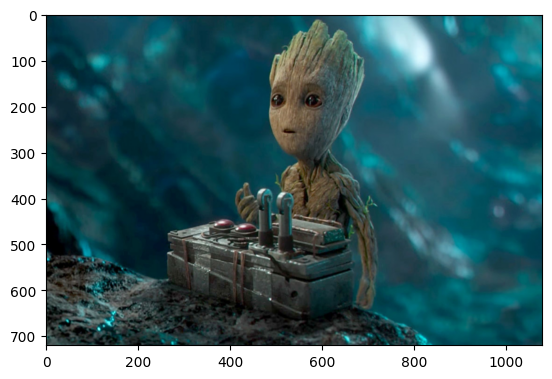

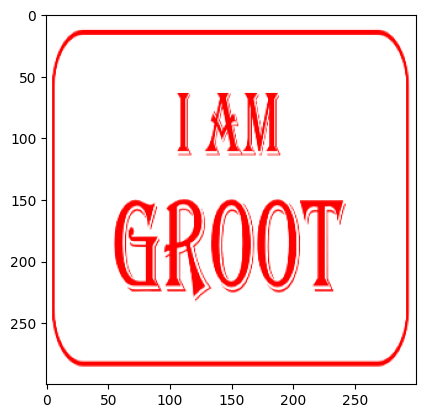

In [44]:
# 그루트 리사이즈 1080x720
resize_groot = cv2.resize(groot, (1080,720))

# 그루트 리사이즈 결과 확인
plt.imshow(resize_groot)
plt.show()


# 워터마크  리사이즈300x300
resize_watermark = cv2.resize(watermark, (300,300))

# 워터마크 리사이즈 결과 확인
plt.imshow(resize_watermark)
plt.show()

# 3.워터마크 이미지 회색조 변경해서 삽입

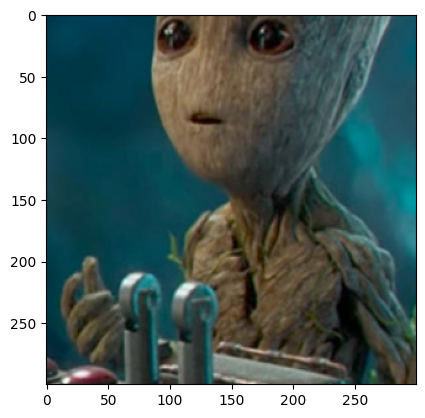

In [45]:
# 워터마크 이미지 정보 가져오기
height, width, channel = resize_watermark.shape

# 워터마크 넣을 지점 설정
x_offset = 400  # x 좌표(가로) 모서리 시작점
y_offset = 170  # y 좌표(세로) 모서리 시작점

# 워터마크 넣을 수 있는 영역 설정
roi = resize_groot[y_offset:470, x_offset:700]
plt.imshow(roi)
plt.show()

- ﻿워터마크는 원래 회색조로 들어가야해요!
﻿

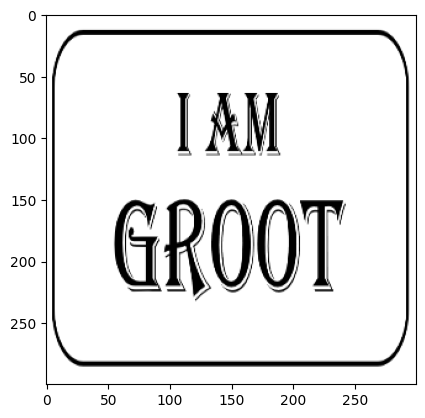

In [46]:
# 워터마크로 사용할 이미지 회색조로 변경 → 이미지의 모든 것 필터링 하도록
resize_watermark_gray = cv2.cvtColor(resize_watermark, cv2.COLOR_RGB2GRAY)
plt.imshow(resize_watermark_gray, 'gray')
plt.show()

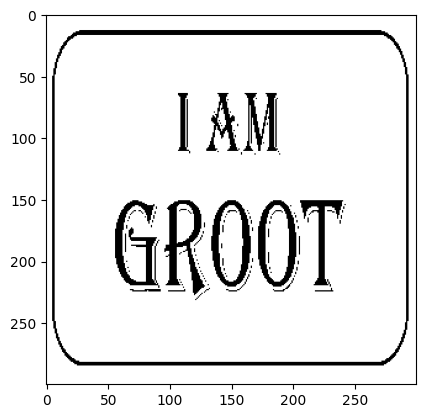

In [47]:
#바이너리 이미지 생성을 위한 임계값 적용
ret, mask = cv2.threshold(resize_watermark_gray, 120, 255, cv2.THRESH_BINARY)
plt.imshow(mask, 'gray')
plt.show()

# 4. 워터마크 삽입

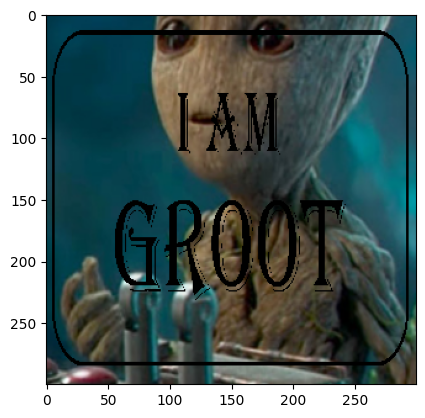

In [48]:
# cv2.bitwise_or 매개변수로 ROI와 마스크를 연산자에 전달
bg = cv2.bitwise_or(roi,roi,mask=mask)
plt.imshow(bg)
plt.show()

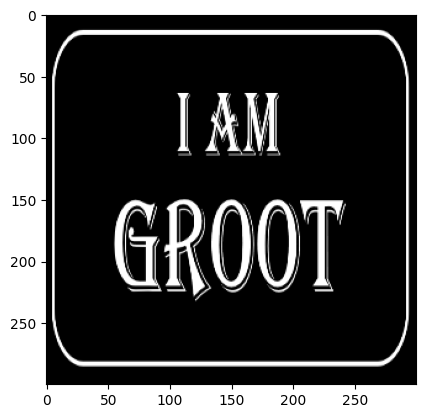

In [52]:
# 빨간색 워터마크를 위해 회색조 및 마스크 반전 필요
mask_inv = cv2.bitwise_not(resize_watermark_gray)

plt.imshow(mask_inv, 'gray')
plt.show()

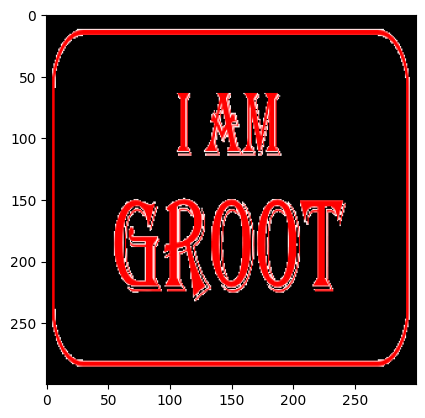

In [55]:
# 빨간색 입히기 + 빛효과(하얀테두리)
fg = cv2.bitwise_and(resize_watermark, resize_watermark, mask=mask_inv)

plt.imshow(fg)
plt.show()

# 6. 완성된 워터마크 재삽입

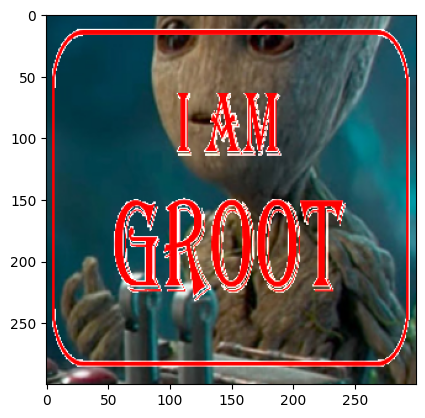

In [57]:
#워터마크 재삽입
final_roi = cv2.add(bg,fg)

plt.imshow(final_roi)
plt.show()